Dada la gran escala del conjunto de datos, hemos adoptado un enfoque basado en bloques para realizar el procesamiento. Este enfoque nos permite evitar cargar todo el conjunto de datos en memoria, lo que a su vez nos permite realizar modificaciones de manera eficiente. En consecuencia, todos los datos que no cumplan con los criterios requeridos o que sean incorrectos se manejarán mediante la aplicación de filtros adecuados.

In [ ]:
import pandas as pd


chunk_size = 1000
num_rows = 0


for df_chunk in pd.read_json('review-001.json', lines=True, chunksize=chunk_size):
    num_rows += len(df_chunk)


print("El archivo tiene", num_rows, "filas.")


Ahora veremos los valores faltantes, los valores nulos y el tipo de dato de las columnas.

In [13]:
import pandas as pd


chunk_size = 100000  
data_generator = pd.read_json(
    'review-001.json', lines=True, chunksize=chunk_size)


missing_values = {}
data_types = {}
null_counts = {}


for i, batch_data in enumerate(data_generator):
   
    batch_missing = batch_data.isnull().sum()
    batch_missing_percent = (batch_missing / len(batch_data)) * 100

    
    batch_types = batch_data.dtypes

    
    if i == 0:
        missing_values = batch_missing
        data_types = batch_types
        null_counts = batch_data.isnull().sum()
    else:
        missing_values += batch_missing
        null_counts += batch_data.isnull().sum()


missing_percent = (missing_values / len(batch_data)) * 100


print("Valores faltantes por columna:")
print(missing_values)
print("\nPorcentaje de valores faltantes por columna:")
print(missing_percent)
print("\nTipos de variable por columna:")
print(data_types)
print("\nCantidad de valores nulos por columna:")
print(null_counts)


Valores faltantes por columna:
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

Porcentaje de valores faltantes por columna:
review_id      0.0
user_id        0.0
business_id    0.0
stars          0.0
useful         0.0
funny          0.0
cool           0.0
text           0.0
date           0.0
dtype: float64

Tipos de variable por columna:
review_id              object
user_id                object
business_id            object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

Cantidad de valores nulos por columna:
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


Podemos ver que no hay ningun valor faltante ni valores nulos. 

Veremos la distribucion de "stars" en un histograma.

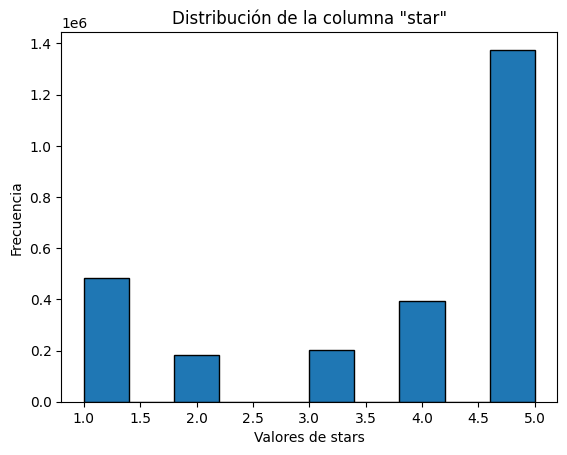

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


chunk_size = 1000
chunks = pd.read_json('review-001.json',
                      lines=True, chunksize=chunk_size)


useful_values = []


for chunk in chunks:
    
    useful_chunk = chunk['stars']
    
    useful_values.extend(useful_chunk)

plt.hist(useful_values, bins=10, edgecolor='black')
plt.xlabel('Valores de stars')
plt.ylabel('Frecuencia')
plt.title('Distribución de la columna "star"')
plt.show()



Si hay una mayor concentración de puntuaciones por encima de 3.5 en las reseñas, podría indicar que la mayoría de las experiencias de los usuarios son positivas. Esto sugiere que los usuarios tienden a calificar favorablemente los negocios que están revisando.

Veremos la distribucion de stars por locales

C:\Users\Yamil\AppData\Local\Temp\ipykernel_9640\2152669114.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  business_count = pd.Series()


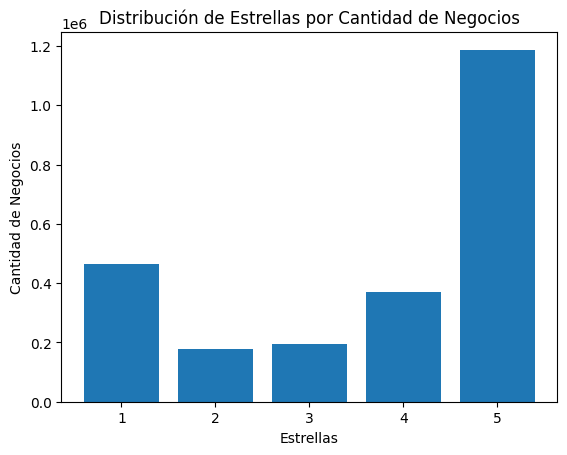

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df_chunks = pd.read_json(
    'filtered_reviews_last_5_years.json', lines=True, chunksize=1000)


business_count = pd.Series()


for chunk in df_chunks:
    
    business_count_chunk = chunk.groupby('stars')['business_id'].nunique()
    business_count = business_count.add(business_count_chunk, fill_value=0)


plt.bar(business_count.index, business_count.values)
plt.xlabel('Estrellas')
plt.ylabel('Cantidad de Negocios')
plt.title('Distribución de Estrellas por Cantidad de Negocios')
plt.show()


En proporcion, hay mas locales con una buena puntuacion, y muchos menos con una puntuacion "baja". Si bien esto es general y no esta filtrado por bares podemos tener un panorama de cual es la distribucion de las estrellas.

Ahora vemos la cantidad de negocios por estrella

In [5]:
import pandas as pd


df_chunks = pd.read_json('review-001.json', lines=True, chunksize=1000)


business_count = pd.Series()


for chunk in df_chunks:
  
    business_count_chunk = chunk['stars'].value_counts()
    business_count = business_count.add(business_count_chunk, fill_value=0)


for stars, count in business_count.items():
    print(f"{stars} estrella(s): {int(count)} negocio(s)")


C:\Users\Yamil\AppData\Local\Temp\ipykernel_17936\1561006832.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  business_count = pd.Series()


1 estrella(s): 1069561 negocio(s)
2 estrella(s): 544240 negocio(s)
3 estrella(s): 691934 negocio(s)
4 estrella(s): 1452918 negocio(s)
5 estrella(s): 3231627 negocio(s)


Ahora el numero exacto de negocios agrupado por cantidad de estrellas.

In [8]:
import pandas as pd


block_size = 1000


min_value = float('inf')
max_value = float('-inf')


data_iterator = pd.read_json(
    'review-001.json', lines=True, chunksize=block_size)


for block_data in data_iterator:
    
    block_min = block_data['useful'].min()
    block_max = block_data['useful'].max()

    
    min_value = min(min_value, block_min)
    max_value = max(max_value, block_max)


print("Rango de valores de la columna 'useful':", (min_value, max_value))


Rango de valores de la columna 'useful': (-1, 1182)


Podemos ver que el rango de useful empieza en -1 lo cual es ilogico porque son botos de utilidad, por lo que es un error que hay que tener en cuenta. 

In [9]:
import pandas as pd


block_size = 1000


data_iterator = pd.read_json(
    'review-001.json', lines=True, chunksize=block_size)

for block_data in data_iterator:
   
    filtered_data = block_data[block_data['useful'] == -1]

    
    if not filtered_data.empty:
        print("Filas con useful igual a -1:")
        print(filtered_data)


Filas con useful igual a -1:
                      review_id                 user_id  \
1933674  plhadSWfXZFKRAhEztb6Dw  0Q4ouqkcwrVE_Im6a6Tomw   

                    business_id  stars  useful  funny  cool  \
1933674  SJQePJL1bkeEk-6gp-6eeA      1      -1      0     0   

                                                      text                date  
1933674  This complaint has nothing to do with the qual... 2018-12-23 01:35:31  
Filas con useful igual a -1:
                      review_id                 user_id  \
2008201  gk_9N_c-7oEgzrXVDaR8-g  lEOLrNxD4wknYyERp1FGXw   

                    business_id  stars  useful  funny  cool  \
2008201  SJQePJL1bkeEk-6gp-6eeA      1      -1      0     0   

                                                      text                date  
2008201  Only bounce play place in Hendersonville and t... 2016-01-17 00:21:53  
Filas con useful igual a -1:
                      review_id                 user_id  \
2046381  iYS4pfUCUPT_TEmW6BOnrA  1p8Pu

In [10]:
import pandas as pd

block_size = 1000


min_value = float('inf')
max_value = float('-inf')


data_iterator = pd.read_json(
    'review-001.json', lines=True, chunksize=block_size)


for block_data in data_iterator:
    
    block_min = block_data['funny'].min()
    block_max = block_data['funny'].max()

    
    min_value = min(min_value, block_min)
    max_value = max(max_value, block_max)


print("Rango de valores de la columna 'funny':", (min_value, max_value))


Rango de valores de la columna 'funny': (-1, 792)


Podemos ver que el rango de useful empieza en -1 lo cual es ilogico porque son botos de utilidad, por lo que es un error que hay que tener en cuenta. 

In [11]:
import pandas as pd


block_size = 1000


min_value = float('inf')
max_value = float('-inf')


data_iterator = pd.read_json(
    'review-001.json', lines=True, chunksize=block_size)


for block_data in data_iterator:
    
    block_min = block_data['cool'].min()
    block_max = block_data['cool'].max()

    
    min_value = min(min_value, block_min)
    max_value = max(max_value, block_max)


print("Rango de valores de la columna 'cool':", (min_value, max_value))


Rango de valores de la columna 'cool': (-1, 404)


Pasa lo mismo con "cool". Es necesario filtrar estos valores ya que por el momento no podemos borrarlos.

Haremos un mapa de calor para ver si hay variables numericas relacionadas entre si 

C:\Users\Yamil\AppData\Local\Temp\ipykernel_19904\1938309849.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(block.sample(
C:\Users\Yamil\AppData\Local\Temp\ipykernel_19904\1938309849.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(block.sample(
C:\Users\Yamil\AppData\Local\Temp\ipykernel_19904\1938309849.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(block.sample(
C:\Users\Yamil\AppData\Local\Temp\ipykernel_19904\1938309849.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(block.sample(


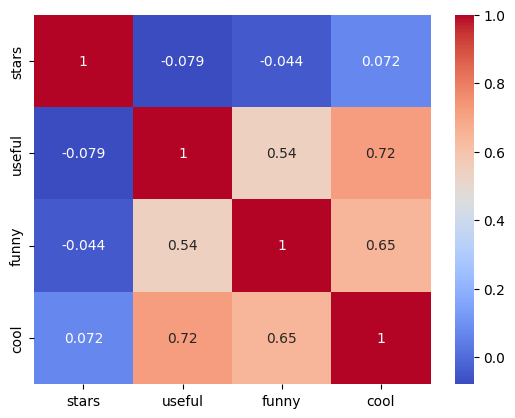

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
import random


block_size = 100000
desired_rows = 2000000


data_iterator = pd.read_json(
    'review-001.json', lines=True, chunksize=block_size)


sample_data = pd.DataFrame()


for block in data_iterator:
    if len(sample_data) < desired_rows:
        sample_data = sample_data.append(block.sample(
            n=min(block_size, desired_rows - len(sample_data)), random_state=42))
    else:
        break


correlation_matrix = sample_data[['stars', 'useful', 'funny', 'cool']].corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


plt.show()


Como podemos ver hay una sola relacion, "cool" y "useful". por lo tanto cuando se bota por useful, en general tambien se bota por "cool". No veo que las variables relacionadas sirvan para los analisis que nos competen. 

Vemos la cantidad de reseñas a lo largo del tiempo 

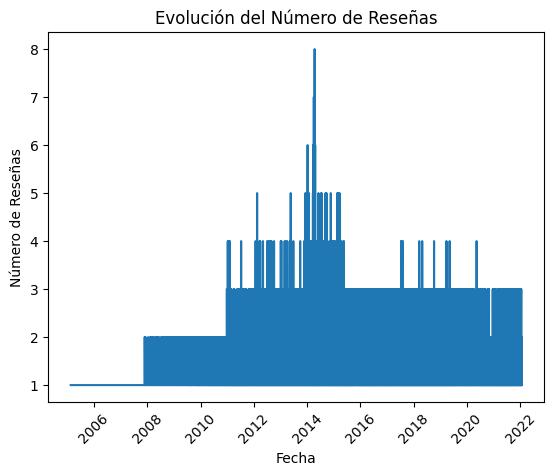

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


block_size = 200000
data_iterator = pd.read_json(
    'review-001.json', lines=True, chunksize=block_size)


date_list = []


for data_block in data_iterator:
    date_list.extend(data_block['date'])


date_list = pd.to_datetime(date_list)


review_count_by_date = date_list.value_counts().sort_index()


plt.plot(review_count_by_date.index, review_count_by_date.values)
plt.xlabel('Fecha')
plt.ylabel('Número de Reseñas')
plt.title('Evolución del Número de Reseñas')
plt.xticks(rotation=45)
plt.show()


Podemos notar que entre 2020 y 2022. Con esto veo que seria pertinente, acotar los datos por fecha para hacer el analisis mas factible ya que los problemas de memoria son muchos.

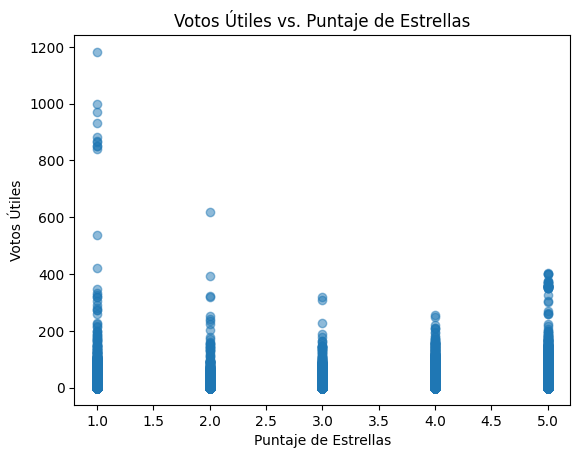

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


block_size = 200000
data_iterator = pd.read_json(
    'review-001.json', lines=True, chunksize=block_size)


useful_list = []
stars_list = []


for data_block in data_iterator:
    useful_list.extend(data_block['useful'])
    stars_list.extend(data_block['stars'])


plt.scatter(stars_list, useful_list, alpha=0.5)
plt.xlabel('Puntaje de Estrellas')
plt.ylabel('Votos Útiles')
plt.title('Votos Útiles vs. Puntaje de Estrellas')
plt.show()


Podemos apreciar que cuando la estrella es baja, hay mas interaccion de usuarios al comentario del usuario por lo que podemos inferir que las malas reputaciones se extienden mas rapido que las buenas.